In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df_india = pd.read_csv('datasets/modis/2020/modis_2020_India.csv')

In [3]:
df_india.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.1282,96.9943,301.4,1.7,1.3,2020-01-01,357,Terra,MODIS,40,6.03,278.8,15.3,D,0
1,33.1827,74.0774,301.5,1.5,1.2,2020-01-01,534,Terra,MODIS,48,6.03,280.6,12.3,D,0
2,30.0068,80.6242,300.6,1.1,1.1,2020-01-01,535,Terra,MODIS,38,6.03,278.7,9.1,D,0
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,Terra,MODIS,58,6.03,288.8,6.4,D,0
4,30.1529,80.2387,301.9,1.1,1.0,2020-01-01,535,Terra,MODIS,41,6.03,274.5,7.3,D,0


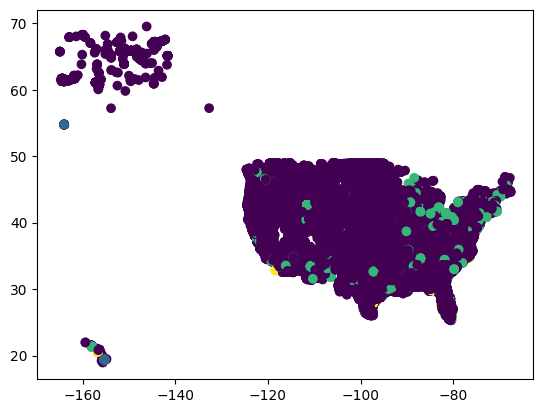

In [15]:
df_india = pd.read_csv('datasets/modis/2020/modis_2020_United_States.csv')
plt.scatter(df_india['longitude'], df_india['latitude'], c=df_india['type'])

# Making Global Dataset by year

In [34]:
import glob
import os 


# get all folders by years

folders = glob.glob('datasets/modis/*')
batch = 10
global_folder_name = 'datasets/global_modis'
try:
    os.mkdir(global_folder_name)
except FileExistsError as e:
    print('folder already exists. continuing')
except Exception as e:
    raise e

for i in folders:
    current_year = i.split('/')[-1]
    new_file_name = f'modis_global_data_{current_year}.csv'
    files = glob.glob(f'{i}/**.csv')
    print(current_year)
    files_appended = []
    master_files: pd.DataFrame | None = None 
    for j in range(len(files)):
        current_country: str = ' '.join(files[j].split('/')[-1].split(f'_{current_year}_')[-1].removesuffix('.csv').split('_'))
        current_file = files[j] 
        current_batch = 0
        df = pd.read_csv(current_file)
        df['country'] = current_country

        if (j+1) % batch == 0 or j >= len(files):
            batch_df = pd.concat(files_appended)
            current_batch += 1 
            if master_files is None:
                master_files = batch_df
            else:
                master_files = pd.concat([master_files, batch_df])
            files_appended = []
            print(f'CURRENT RUNNING YEAR {current_year} | PROGRESS {current_batch}/{len(files)/current_batch}')
            del batch_df
        else:
            files_appended.append(df)

    if master_files is not None:
        master_files.to_csv(f'{global_folder_name}/{new_file_name}', index= False)
        del master_files

folder already exists. continuing
2020
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
CURRENT RUNNING YEAR 2020 | PROGRESS 1/211.0
2021
CURRENT RUN

In [1]:
import pandas as pd

global_2020_data = pd.read_csv('datasets/global_modis/modis_global_data_2020.csv')

In [2]:

global_2020_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667922 entries, 0 to 3667921
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  int64  
 10  version     float64
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
 15  country     object 
dtypes: float64(8), int64(3), object(5)
memory usage: 447.7+ MB


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 

type
0    3497687
2     166736
1       2194
3       1305
Name: count, dtype: int64


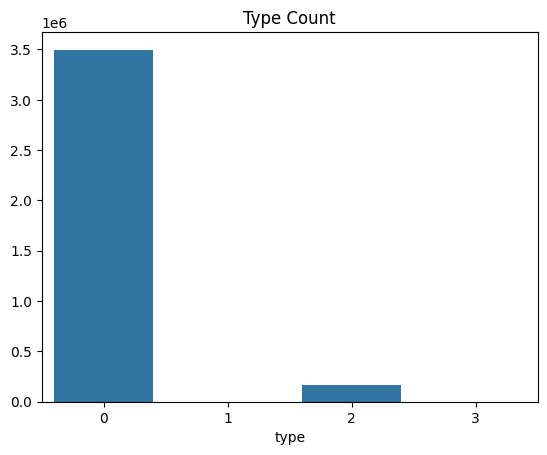

In [9]:
type_count = global_2020_data['type'].value_counts()
print(type_count)
sns.barplot(x=type_count.keys(), y=type_count.values)
plt.title("Type Count")
plt.show()

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'brightness'}>],
       [<Axes: title={'center': 'scan'}>,
        <Axes: title={'center': 'track'}>,
        <Axes: title={'center': 'acq_time'}>],
       [<Axes: title={'center': 'confidence'}>,
        <Axes: title={'center': 'version'}>,
        <Axes: title={'center': 'bright_t31'}>],
       [<Axes: title={'center': 'frp'}>,
        <Axes: title={'center': 'type'}>, <Axes: >]], dtype=object)

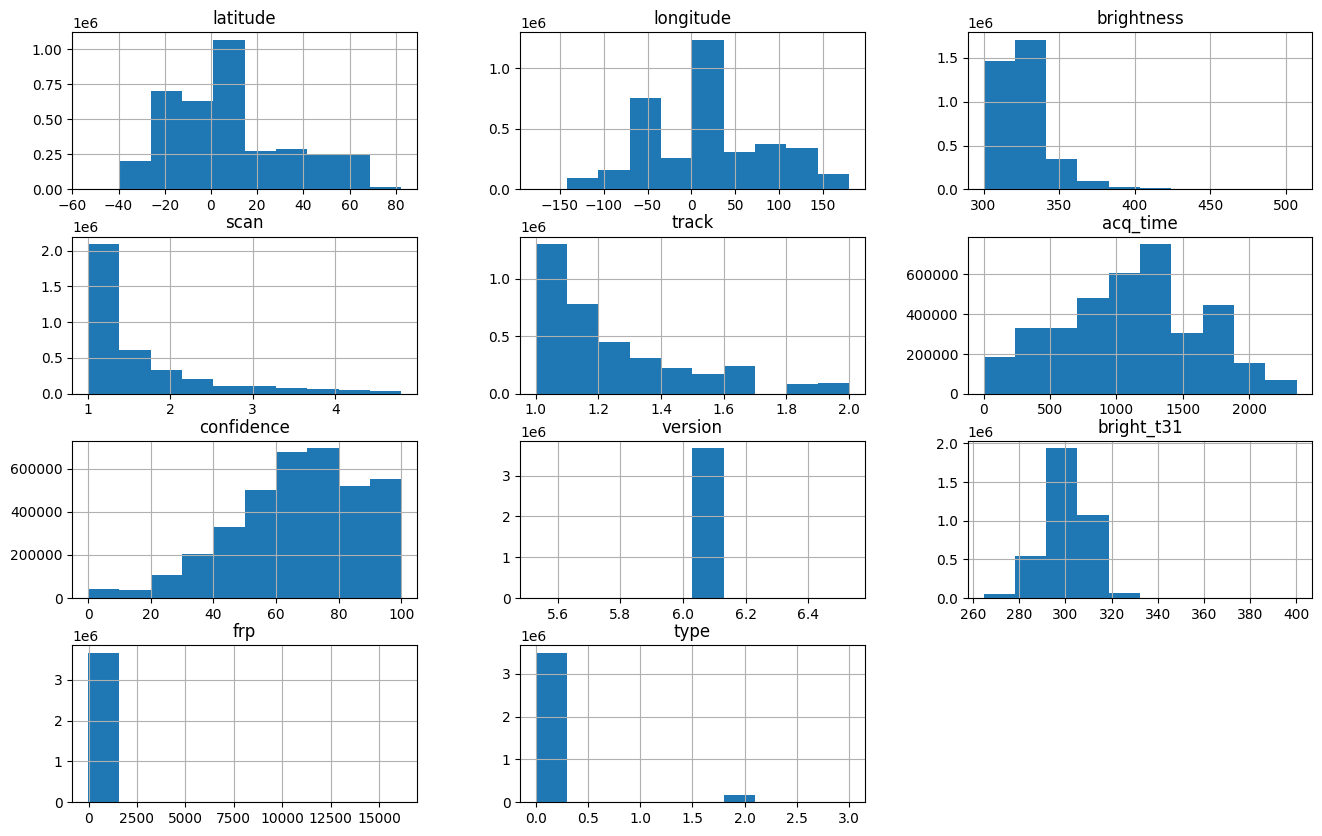

In [13]:

global_2020_data.hist(figsize=(16,10),)


In [ ]:
global_2020_data.plot.bar()